In [7]:
%matplotlib ipympl

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as pn

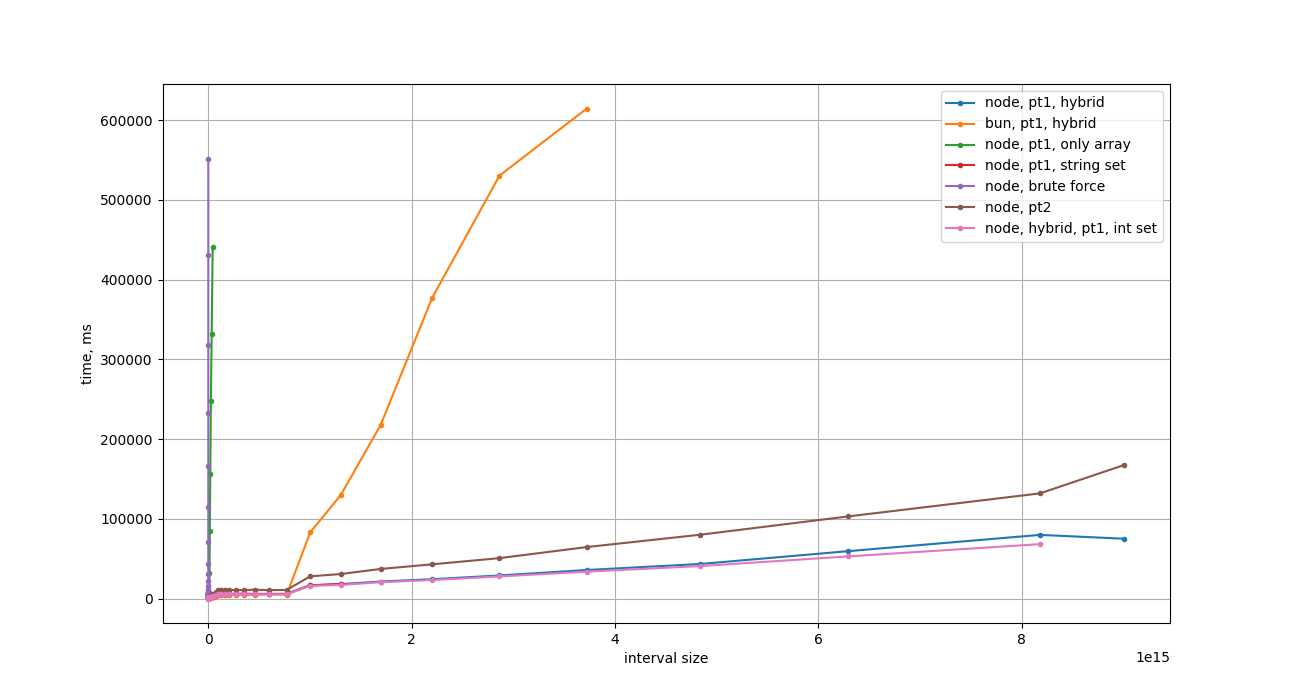

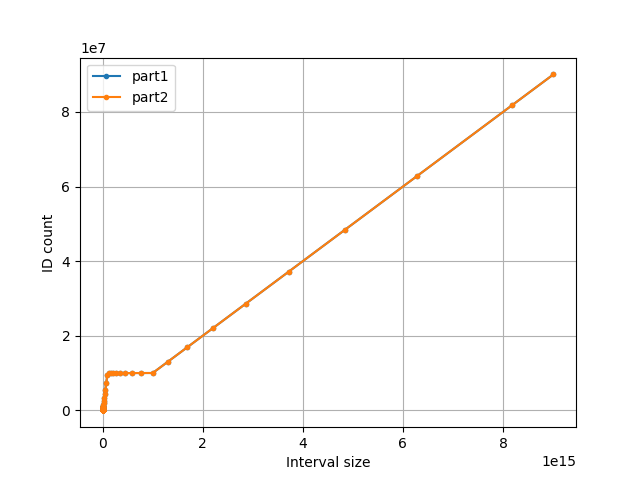

In [14]:
df = pd.read_csv("time_measure_highres_hybrid.csv")
df2 = pd.read_csv("time_measure_highres_hybrid_bun.csv")
df3 = pd.read_csv("time_measure_highres_noset.csv")
df4 = pd.read_csv("time_measure_highres.csv")
df5 = pd.read_csv("time_measure_highres_hybrid_pt2.csv")
df6 = pd.read_csv("time_measure_highres_hybrid_intset.csv")

# Plot 1: x=i, y=bftime and mytime
plt.figure(figsize=(13,7))
# plt.plot(df["i"], df["bftime"])
plt.plot(df["i"], df["mytime"], label="node, pt1, hybrid",marker='.')
plt.plot(df2["i"], df2["mytime"], label="bun, pt1, hybrid",marker='.')
plt.plot(df3["i"], df3["mytime"], label="node, pt1, only array",marker='.')
plt.plot(df4["i"], df4["mytime"], label="node, pt1, string set",marker='.')
plt.plot(df4["i"], df4["bftime"], label="node, brute force",marker='.')
plt.plot(df5["i"], df5["mytime"], label="node, pt2",marker='.')
plt.plot(df6["i"], df6["mytime"], label="node, hybrid, pt1, int set",marker='.')
plt.xlabel("interval size")
plt.ylabel("time, ms")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: x=i, y=numcount
plt.figure()
plt.plot(df["i"], df["numcount"], marker='.', label="part1")
plt.plot(df5["i"], df5["numcount"], marker='.', label="part2")
plt.xlabel("Interval size")
plt.ylabel("ID count")
plt.grid(True)
plt.legend()
plt.show()

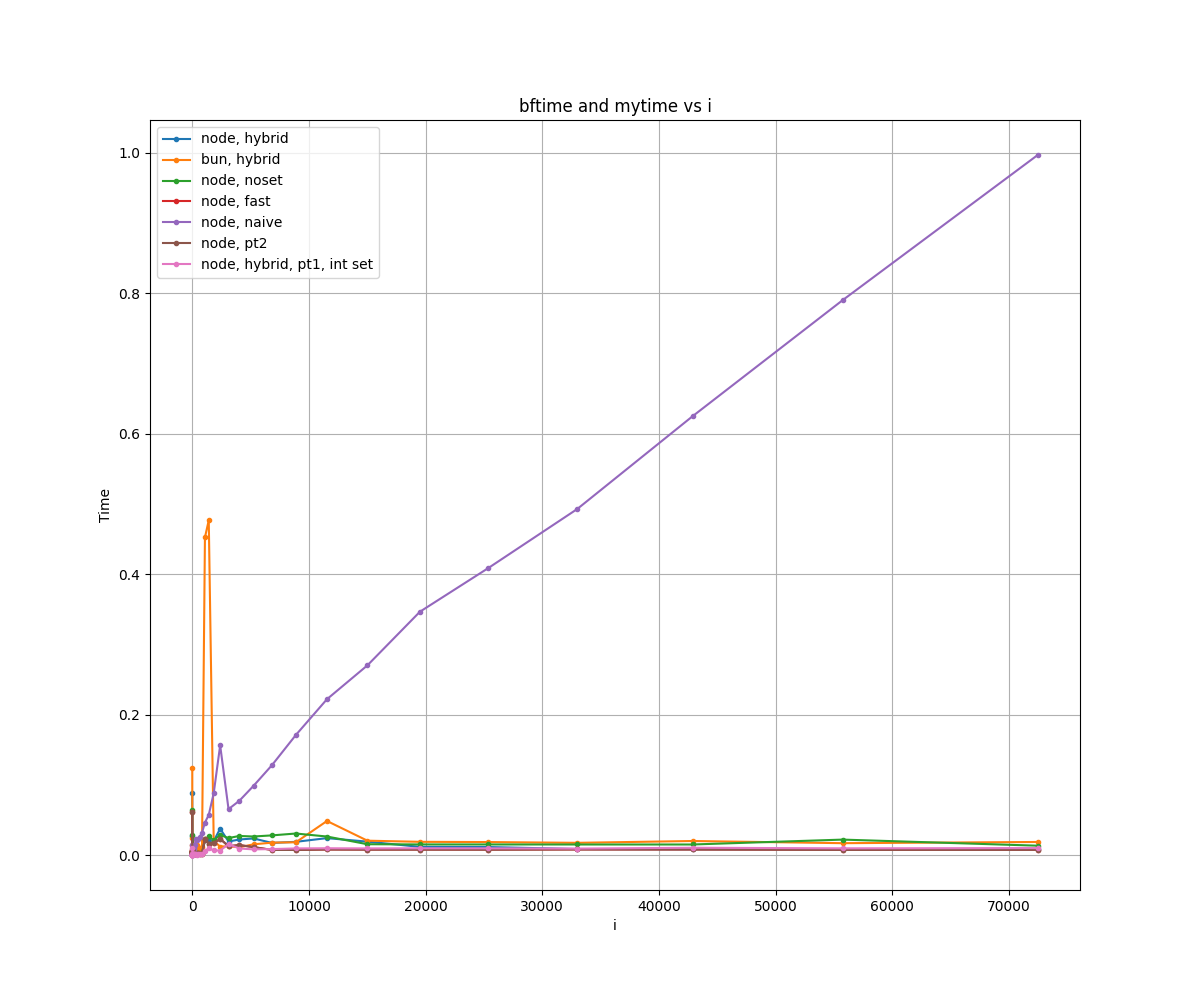

In [16]:
# Plot 1: x=i, y=bftime and mytime
plt.figure(figsize=(12,10))
# plt.plot(df["i"], df["bftime"])
take = 40

plt.plot(df["i"][:take], df["mytime"][:take], label="node, hybrid", marker='.')
plt.plot(df2["i"][:take], df2["mytime"][:take], label="bun, hybrid",marker='.')
plt.plot(df3["i"][:take], df3["mytime"][:take], label="node, noset",marker='.')
plt.plot(df4["i"][:take], df4["mytime"][:take], label="node, fast",marker='.')
plt.plot(df4["i"][:take], df4["bftime"][:take], label="node, naive", marker='.')
plt.plot(df5["i"][:take], df4["mytime"][:take], label="node, pt2",marker='.')
plt.plot(df6["i"][:take], df6["mytime"][:take], label="node, hybrid, pt1, int set",marker='.')
plt.xlabel("i")
plt.ylabel("Time")
plt.title("bftime and mytime vs i")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
df = pd.read_csv("time_measure_highres_hybrid.csv")
df2 = pd.read_csv("time_measure_highres_hybrid_bun.csv")
df3 = pd.read_csv("time_measure_highres_noset.csv")
df4 = pd.read_csv("time_measure_highres.csv")
df5 = pd.read_csv("time_measure_highres_hybrid_pt2.csv")
df6 = pd.read_csv("time_measure_highres_hybrid_intset.csv")

df = df[['i','mytime']].rename(columns={'mytime': 'node_hybrid'})
df2 = df2[['i','mytime']].rename(columns={'mytime': 'bun_hybrid'})
df3 = df3[['i','mytime']].rename(columns={'mytime': 'noset'})
df4 = df4[['i','mytime', 'bftime']].rename(columns={'mytime': 'fast', 'bftime': 'naive'})
df5 = df5[['i','mytime']].rename(columns={'mytime': 'pt2'})
df6 = df6[['i','mytime']].rename(columns={'mytime': 'fast_intset'})
df_total=df.merge(
    df2, on='i',how='outer'
).merge(
    df3, on='i',how='outer'
).merge(
    df4, on='i',how='outer'
).merge(
    df5, on='i', how='outer'
).merge(
    df6, on='i', how='outer'
)
df_total.to_csv("combined.csv", index=False)

In [18]:
df_total = pd.read_csv('combined.csv')

/Users/dasd/.local/share/pyenv/versions/3.13.7/envs/sandbox/lib/python3.13/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_point : Removed 93 rows containing missing values.
/Users/dasd/.local/share/pyenv/versions/3.13.7/envs/sandbox/lib/python3.13/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_text : Removed 93 rows containing missing values.


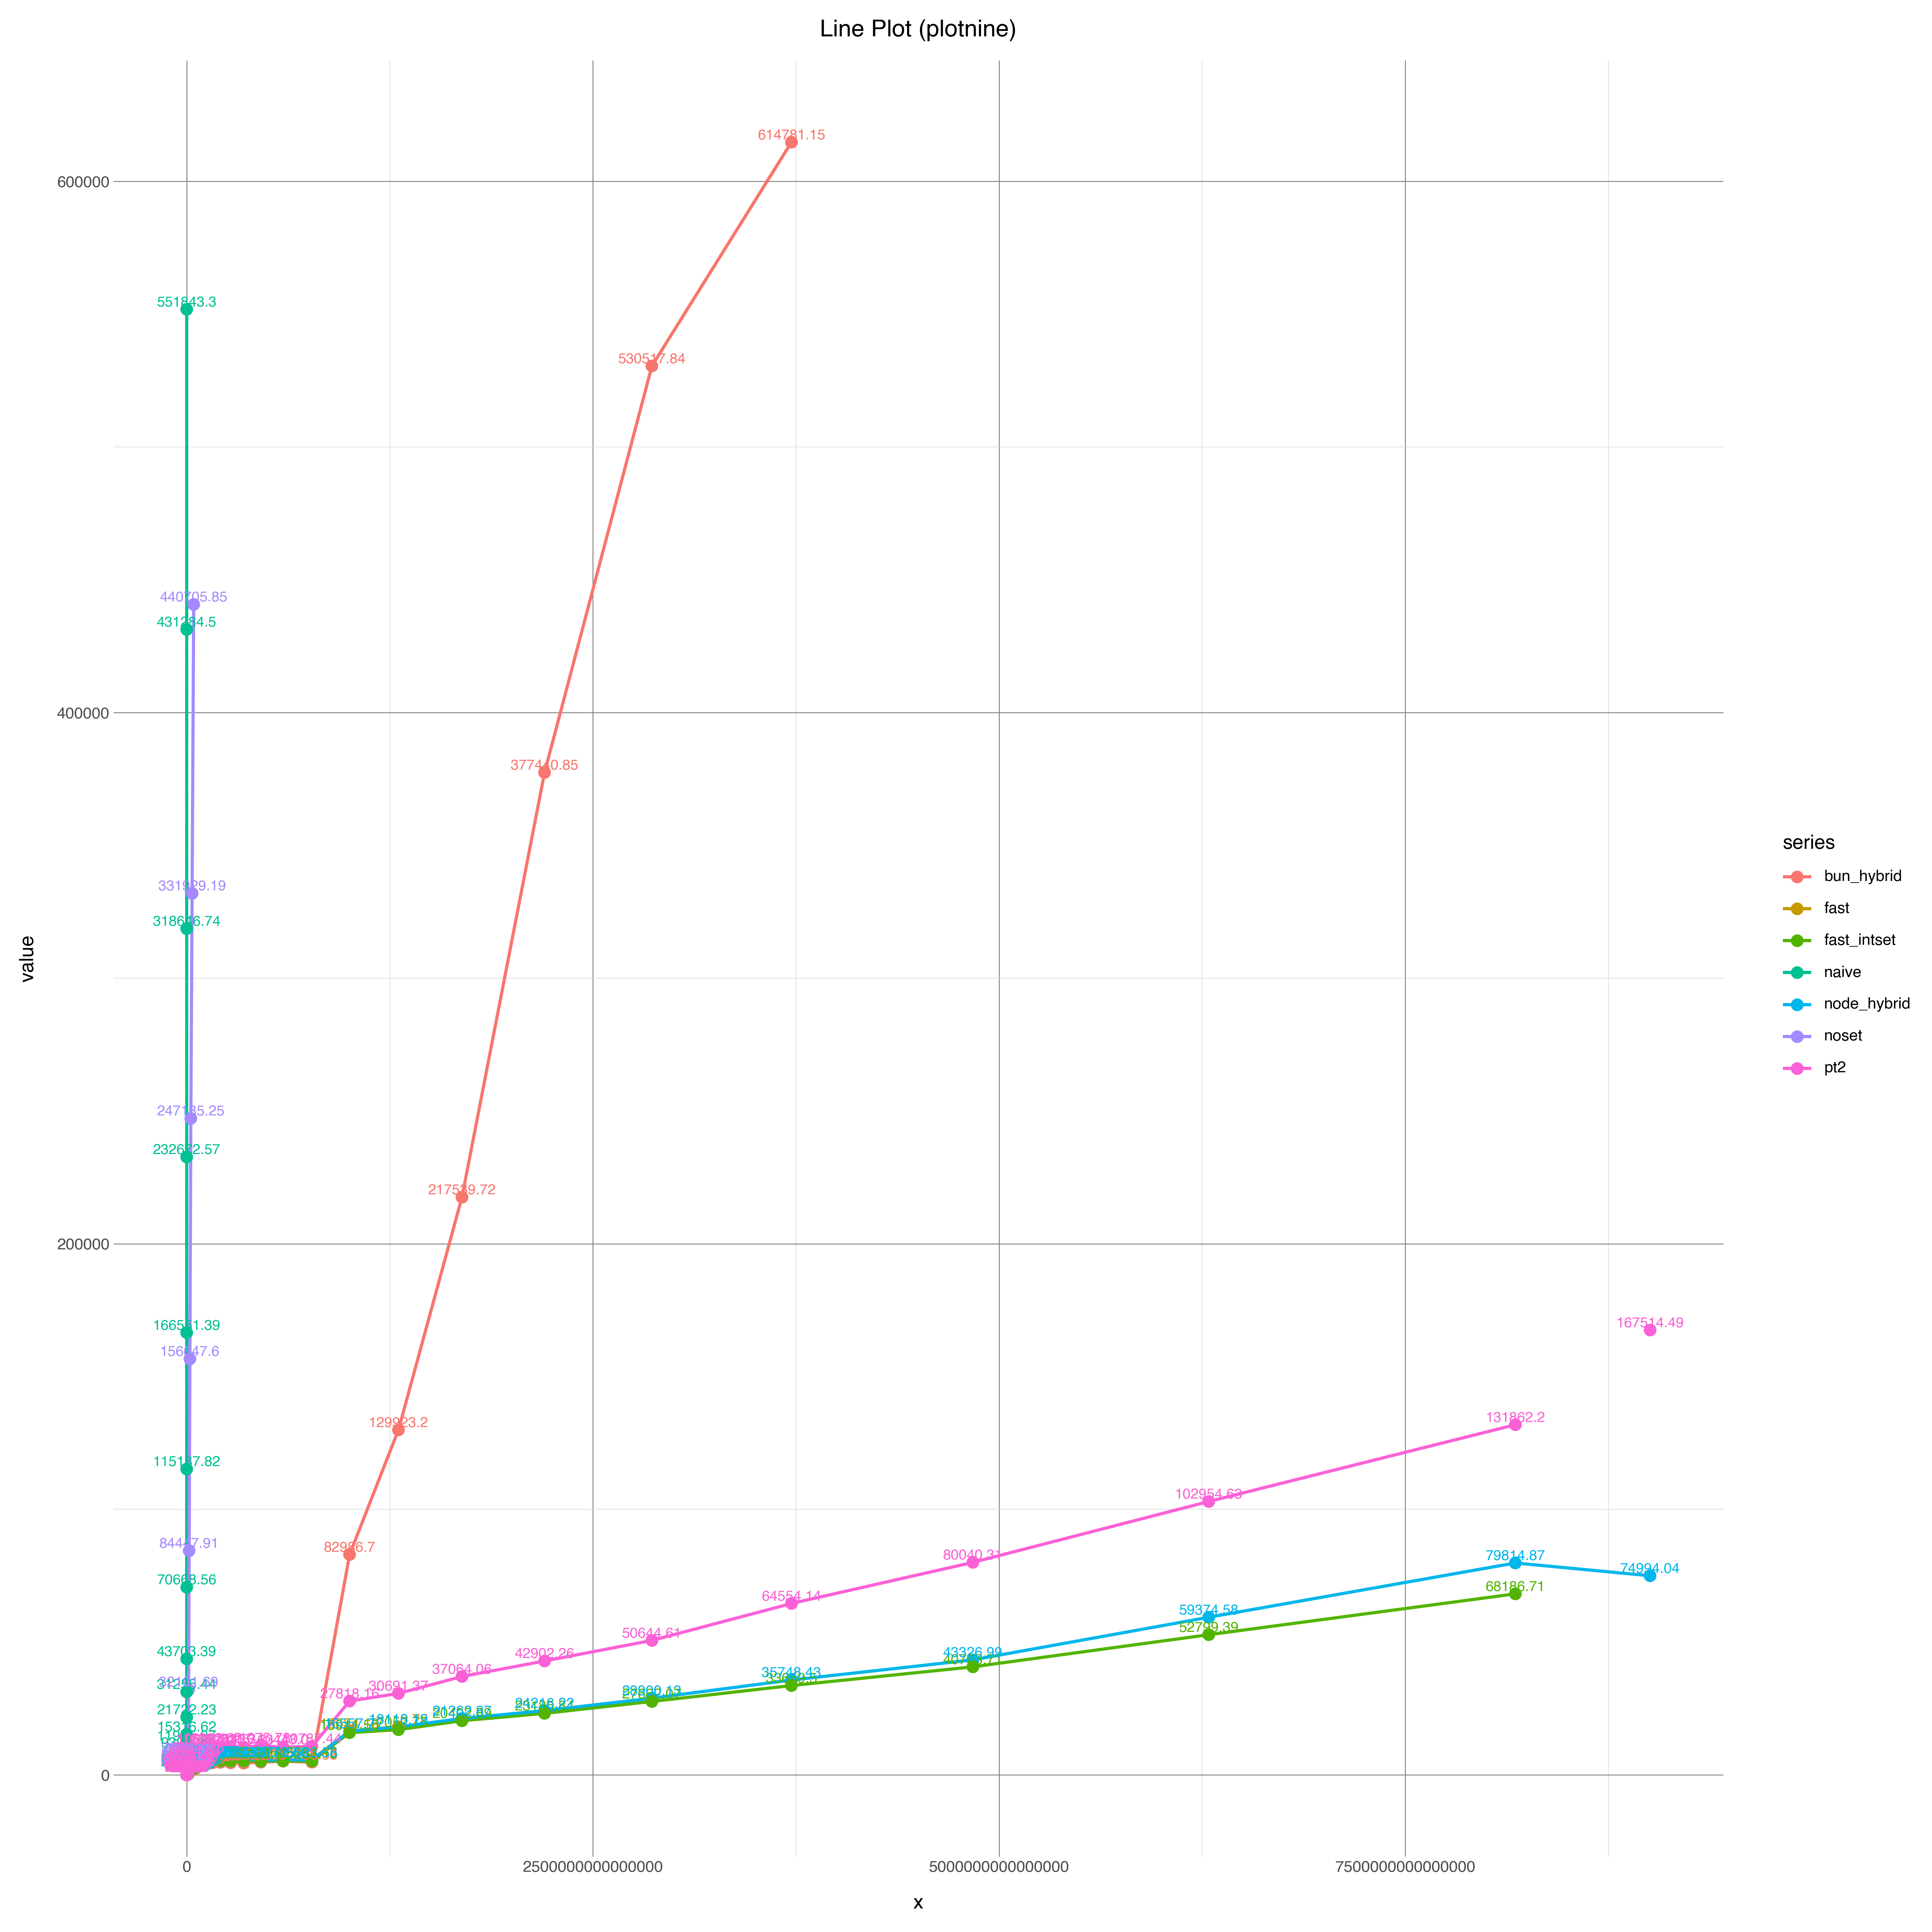

In [22]:
# df has columns: x, y, y2, y3
df_long = df_total.melt(id_vars='i', value_vars=['node_hybrid', 'bun_hybrid', 'noset', 'fast', 'fast_intset', 'naive', 'pt2'],
                  var_name='series', value_name='value')

plot = (
    pn.ggplot(df_long, pn.aes('i', 'value', color='series')) +
        
    # Line + points
    pn.geom_line(size=1) +
    pn.geom_point(size=3) +
    # Show y-values above points
    pn.geom_text(pn.aes(label='round(value, 2)'), va='bottom', ha='center', size=8, nudge_y=0.1) +

    
    pn.labs(title="Line Plot (plotnine)",
         x="x", y="value") +
    
    # Make grid denser
    pn.theme_minimal() +
    pn.theme(
        figure_size=(15,15),
        panel_grid_major=pn.element_line(color='grey', size=0.5),
        panel_grid_minor=pn.element_line(color='lightgrey', size=0.3),
    ) 
    # +
    # pn.scale_y_continuous(breaks=lambda limits: list(range(int(limits[0]), int(limits[1])+1))) +
    # pn.scale_x_continuous(breaks=lambda limits: list(range(int(limits[0]), int(limits[1])+1)))

)

plot
